# Extra Plotting Practice: Creating Colour-Magnitude Diagram #

## Essential Background Information ##

The Hertzsprung-Russell (HR) diagram plots a star's luminosity (or brightness) on the y-axis and its temperature on the x-axis. Astronomers use HR diagrams to classify stars; different types of stars clump together on the HR diagram. You saw the HR diagram in the last example of Lesson 6: Plotting Jupyter Notebook. That HR diagram was an *idealized* representation of distinct groupings of stars, e.g., the Main Sequence, the Horizonal Branch, the Red Giant Branch, etc. So waht about in practice? What does a HR diagram look like with real observational data?

<img src="images/hr.png">

When astronomers make an HR diagram based off of real data in the night sky, they call it the "observer's HR diagram" or **the Color-Magnitude Diagram (CMD)**. This is because instead of luminosity and temperature on the y and x axes, respectively, observers plot the apparent brightness of a star vs. its color. Side note on color for those of you not taking ASTR 101 or 102: color is the difference between a star's brightness in two different color ranges. It is a numerical way to represent actual *colors*. Typically, observers use the B, V, R, I (blue, visible/green, red, infrared) bandpasses, and so will plot V mag vs. B-I mag. 

To make an HR diagram based off of real observations, we point our telescopes at *stars in stellar clusters* and *observe their brightness in various bandpasses*. There are several reasons why we do this:

1) Looking at a stellar cluster ensures that our observer's HR diagram won't have just 10 lonely stars in it, but rather fill the whole parameter space.

2) If you observe the apparent brightnesses of stars in the same stellar cluster, they are roughly at the same distance, which means you can compare the brightness of the stars relative to each other in the cluster, no problem. 

3) Observing the brightnesses of stars in multiple bandpasses or filters allow us to estimate their temperatures. Stars that are hotter will be bluer so they will be brighter in bluer bandpasses relative to redder bandpasses. Stars that are cooler will be redder, so they will be brighter in redder bandpasses relative to blue. For this reason, the relative brightness of an astronomical object between two bandpasses (or the difference in magnitude) is called "color". 

The stellar cluster CMD technique is a powerful tool because it simultaneously tells you the **age** of the cluster and **distance** to that cluster! An "observed" HR diagram, or CMD will look different from the idealized HR diagram from Lesson 6! Consider this: stars in the same cluster will have the same age (and composition), since they were born out of the same molecular cloud at the same time. However, because more massive stars fuse hydrogen faster, they evolve off the main sequence faster, and consequently an *older* stellar cluster will have *fewer* massive stars still in the main sequence phase. As the cluster ages, more and more low-mass stars will evolve off the main sequence, and this "turn-off" from the main sequence track is called... **"the main sequence turn off" (MSTO)**. You can see this effect in the image below. Each panel depicts a snapshot of a stellar cluster at a particular age ($t=0$ when cluster is just born), and shaded region = main sequence.

<img src="http://pages.uoregon.edu/jimbrau/BrauImNew/Chap20/8th/20_17_Figure_Unanno.jpg">

You can read more about CMDs [here](https://web.njit.edu/~gary/202/Lecture17.html) (optional).

## What You Need To Do ##
In this exercise, you will create a CMD based off real data of the [M15 cluster](https://en.wikipedia.org/wiki/Messier_15) astronomers collected! Make sure to **comment your code**.

### First, you will read in the ascii data file that contains the B, V, and I magnitudes of stars. ### 

The data file you need is already in your PreMAP2019 directory (`data/m15.tsv`). Read it in using functions you learned in Lesson 6. Note the file `m15.tsv` has ;-separated values, so when you apply the function you will have to specify keyword argument `delimiter=';'`.


In [3]:
#Copy import statement from notebook 06
import matplotlib.pyplot as plt

# We'll also read some data using astropy, so let's import that
import numpy as np 
from astropy.io import ascii

# I'm also using this "magic" function to make my plots appear in this notebook
# Only do this when working with Jupyter notebooks
%matplotlib inline

In [5]:
# Write code to read in the contents of the ascii file here
#Read in data file using astropy.ascii with delimiter=;
#read in using same syntax we used to import galaxy table in notebook 06
m15 = ascii.read('data/m15.tsv',delimiter=';') 

#Add in the delimiter: this is the character that separates values in different columns of the table
#If you are unsure what the delimiter should be, you can open the file (in the ./data/ folder) and see!
m15[:3] #check out the first three lines of the table to see column names


# Don't forget to comment code! 

_RAJ2000,_DEJ2000,ID,Bmag,e_Bmag,Vmag,e_Vmag,Imag,e_Imag
float64,float64,int32,float64,float64,float64,float64,float64,float64
322.65333,12.12536,2,19.514,0.005,19.021,0.007,18.411,0.01
322.65271,12.04764,4,19.382,0.005,17.96,0.004,16.507,0.004
322.65312,12.16878,6,20.279,0.009,19.763,0.011,19.114,0.014


### Next, make a plot with B-I colour on the x-axis, and V magnitude on the y-axis. ###

Make sure you give the proper x, y axis labels (with units), and make sure the limits of the y-axis is correct (remember the bigger the magnitude, the fainter an object).

Text(0.5, 1.0, 'M15 CMD')

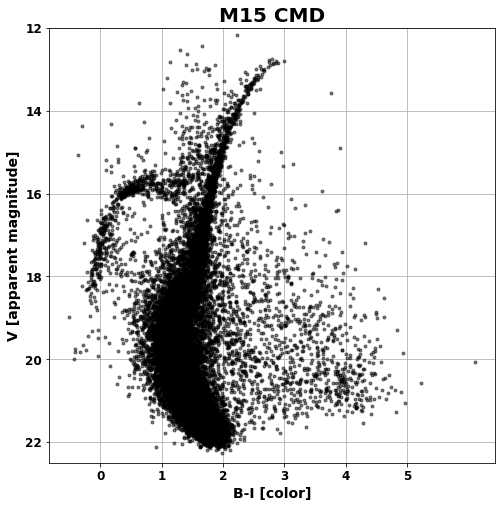

In [20]:
# Write code to make & prettify the plot, use either plt.plot or plt.scatter

#Make plot larger to make it easier to see.
#Note: you need to run this command before your plotting commands!
plt.figure(figsize=(8,8))

#Plot B-I as the x value and V as the y value. Give '.' to plot as points not connected with lines.
x=np.array(m15['Bmag']-m15['Imag'])
y=np.array(m15['Vmag'])
#Adjust markersize and make points translucent with alpha=0.5 so you can see where the points pile up
plt.plot(x,y, '.', alpha=0.5, color='black')

#Flip y-axis so that you're plotting Vmag from fainter (bigger mag value) to brighter (smaller mag value)

#Add axis labels:
plt.xlabel('B-I [color]',fontweight='bold', fontsize=14)
plt.ylabel('V [apparent magnitude]',fontweight='bold',fontsize=14)
plt.ylim(22.5,12)
#Make numbers on axes larger to make plot easier to read
plt.xticks(range(0,6,1),fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')

#Add background grid lines
plt.grid()
# Don't forget to comment code!
plt.title('M15 CMD', fontsize=20,fontweight='bold')

### Finally, let's interpret the pretty plot you've made! ###


1) Locate at least 3 "groups" of stars in your CMD and label them accordingly.  

2) Based on your CMD, is M15 an old cluster or young cluster... how did you come to this conclusion? 

3) Why are there so many data points that are scattered everywhere, and don't look like they belong in the idealized HR diagram?

Text(4, 18, 'Horizontal Branch')

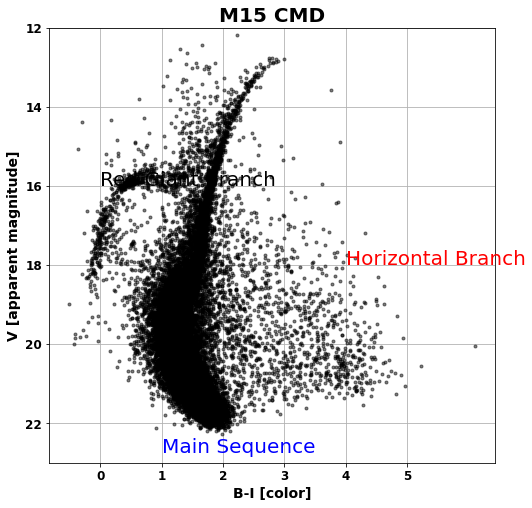

In [28]:
# Copy and paste your plotting code, and modify it to address question 1.
plt.figure(figsize=(8,8))

#Plot B-I as the x value and V as the y value. Give '.' to plot as points not connected with lines.
x=np.array(m15['Bmag']-m15['Imag'])
y=np.array(m15['Vmag'])
#Adjust markersize and make points translucent with alpha=0.5 so you can see where the points pile up
plt.plot(x,y, '.', alpha=0.5, color='black')

#Flip y-axis so that you're plotting Vmag from fainter (bigger mag value) to brighter (smaller mag value)

#Add axis labels:
plt.xlabel('B-I [color]',fontweight='bold', fontsize=14)
plt.ylabel('V [apparent magnitude]',fontweight='bold',fontsize=14)
plt.ylim(23,12)
#Make numbers on axes larger to make plot easier to read
plt.xticks(range(0,6,1),fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')

#Add background grid lines
plt.grid()
# Don't forget to comment code!
plt.title('M15 CMD', fontsize=20,fontweight='bold')
plt.text(1,22.75, 'Main Sequence',fontsize=20, color='blue')
plt.text(0,16, 'Red Giant Branch',fontsize=20)
plt.text(4,18,'Horizontal Branch',fontsize=20, color='red')

In [ ]:
# Answer questions 2 and 3 here